# Graphs

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [7]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [8]:
# Read DataFrame
pkls_path = pkls = r'D:\Tesis\ResEleCon-MX\pickles'
ener = pd.read_pickle(pkls_path + '/total_energy.pkl')

Group households by UPM: sum and mean

In [9]:
ener_ageb = ener.loc[~ener['CVE_ZM'].isnull(), ['CVE_ZM','upm','ing_cor','fuel','gas','kwh','total_ener']].groupby(['CVE_ZM','upm'], as_index=False).sum(min_count=1)
ener_upm_mean = ener.loc[~ener['CVE_ZM'].isnull(), ['CVE_ZM','upm','ing_cor','fuel','gas','kwh','total_ener']].groupby(['CVE_ZM','upm'], as_index=False).mean()

ener_ordered = ener_ageb.sort_values(by=['total_ener'], ignore_index=True)

In [70]:
ener_upm_mean.describe()

,CVE_ZM,upm,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d,income_d
count,5897.000000,5897.000000,5.897000e+03,5355.000000,5552.000000,5875.000000,5896.000000,5875.000000,5355.000000,5552.000000,5897.000000
mean,15.032416,4106.092929,6.263094e+04,846.378237,89.217443,220.411401,748.151871,4.499915,4.494678,4.499820,4.499915
std,9.300404,2408.136152,7.848248e+04,554.673115,199.585483,162.606159,621.025837,2.872881,2.874170,2.873481,2.872879
min,1.010000,1.000000,8.542093e+03,37.036256,0.027210,27.177458,0.089506,0.000000,0.000000,0.000000,0.000000
25%,7.020000,2130.000000,3.813852e+04,475.939742,0.247362,121.936182,333.325016,2.000000,2.000000,2.000000,2.000000
50%,14.010000,4083.000000,5.038709e+04,734.360970,0.354218,163.988350,580.300328,4.000000,4.000000,4.500000,4.000000
75%,23.010000,6125.000000,6.943368e+04,1069.729656,55.804753,260.803346,997.003775,7.000000,7.000000,7.000000,7.000000
max,32.010000,8351.000000,4.033086e+06,6885.275366,3419.881312,1982.472652,9443.953757,9.000000,9.000000,9.000000,9.000000


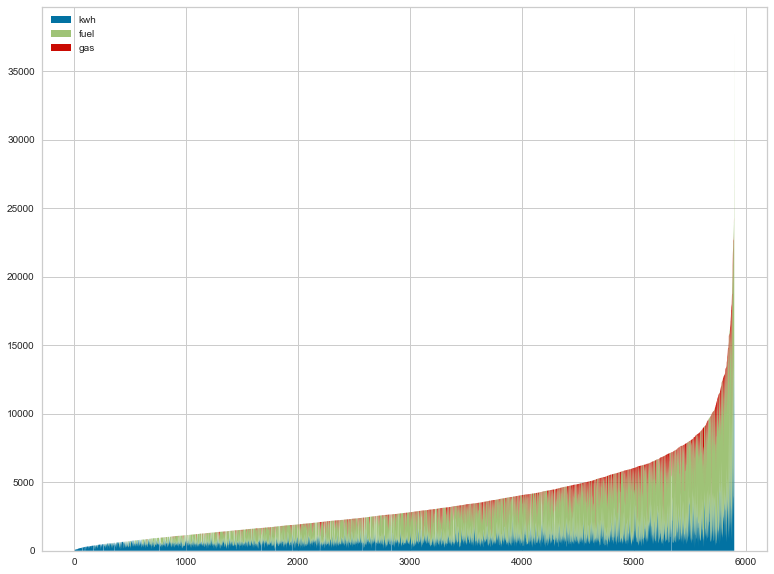

In [11]:
# Data
x=ener_ordered.index
y=[ener_ordered.kwh.to_list(),ener_ordered.fuel.to_list(),ener_ordered.gas.to_list()]

# Plot
fig, ax = plt.subplots(figsize=(13,10))
ax.stackplot(x,y, labels=['kwh','fuel','gas'])
plt.legend(loc='upper left')
plt.show()

## Deciles

In [12]:
ener_upm_mean['kwh_d'] = pd.qcut(ener_upm_mean['kwh'], 10, labels=False)
ener_upm_mean['fuel_d'] = pd.qcut(ener_upm_mean['fuel'], 10, labels=False)
ener_upm_mean['gas_d'] = pd.qcut(ener_upm_mean['gas'], 10, labels=False)

In [13]:
ener_ageb['kwh_d'] = pd.qcut(ener_ageb['kwh'], 10, labels=False)
ener_ageb['fuel_d'] = pd.qcut(ener_ageb['fuel'], 10, labels=False)
ener_ageb['gas_d'] = pd.qcut(ener_ageb['gas'], 10, labels=False)

In [14]:
ener_ageb.describe()

,CVE_ZM,upm,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d
count,5897.000000,5897.000000,5.897000e+03,5355.000000,5552.000000,5875.000000,5896.000000,5875.000000,5355.000000,5552.000000
mean,15.032416,4106.092929,3.019015e+05,2428.633670,325.542053,1029.410574,3538.081734,4.499915,4.484034,4.497298
std,9.300404,2408.136152,2.244631e+05,2149.111043,718.363827,993.882946,2955.619005,2.872881,2.891946,2.875422
min,1.010000,1.000000,1.433151e+04,44.131948,0.027210,27.177458,0.358023,0.000000,0.000000,0.000000
25%,7.020000,2130.000000,1.812054e+05,951.881123,0.651368,513.855630,1517.840324,2.000000,2.000000,2.000000
50%,14.010000,4083.000000,2.494352e+05,1851.834778,1.207206,734.455691,2762.762787,4.000000,4.000000,4.500000
75%,23.010000,6125.000000,3.437963e+05,3236.395817,206.069854,1183.420898,4738.585856,7.000000,7.000000,7.000000
max,32.010000,8351.000000,4.033086e+06,20263.811840,10259.643937,17505.673895,37773.374551,9.000000,9.000000,9.000000


### By sum

In [15]:
ener_reg = ener_ageb[(ener_ageb.kwh_d.notna()) & (ener_ageb.fuel_d.notna()) & (ener_ageb.gas_d.notna())]

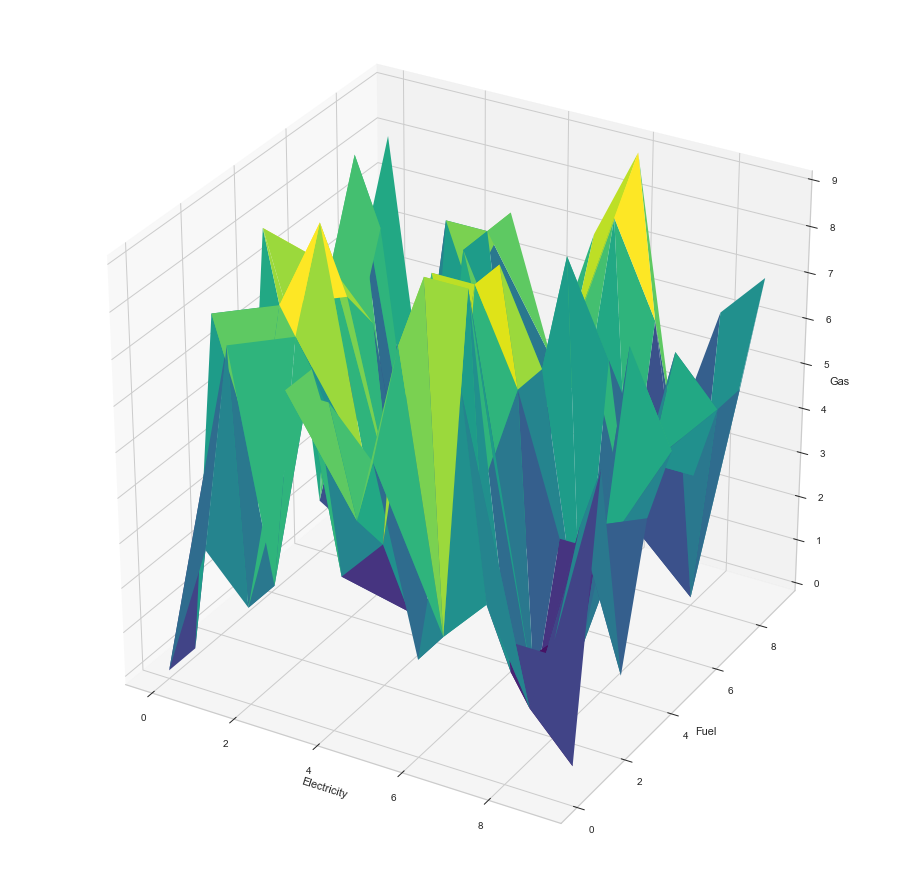

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

ax.plot_trisurf(ener_reg['kwh_d'], ener_reg['fuel_d'], ener_reg['gas_d'], linewidth=0.2, antialiased=True, cmap='viridis', edgecolor='none')

ax.set_xlabel('Electricity')
ax.set_ylabel('Fuel')
ax.set_zlabel('Gas')

plt.show()

### By mean

In [17]:
ener_reg1 = ener_upm_mean[(ener_upm_mean.kwh_d.notna()) & (ener_upm_mean.fuel_d.notna()) & (ener_upm_mean.gas_d.notna())]

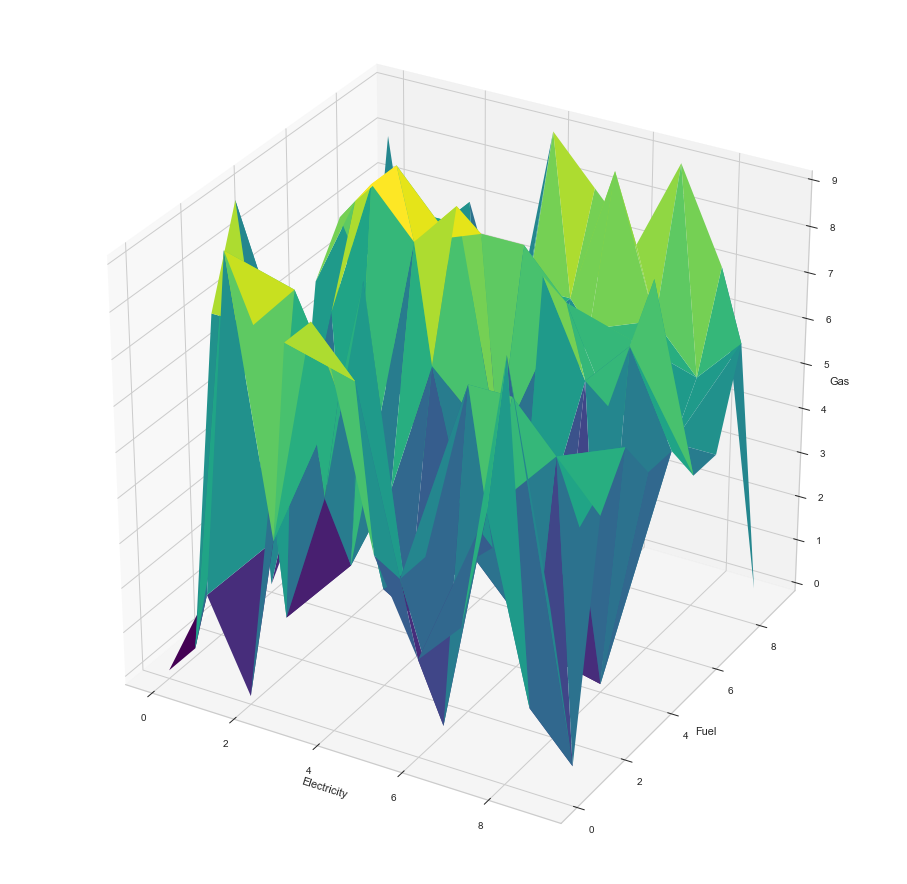

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.gca(projection='3d')

ax.plot_trisurf(ener_reg1['kwh_d'], ener_reg1['fuel_d'], ener_reg1['gas_d'], linewidth=0.2, antialiased=True, cmap='viridis', edgecolor='none')

ax.set_xlabel('Electricity')
ax.set_ylabel('Fuel')
ax.set_zlabel('Gas')

plt.show()

### By sum

In [19]:
ener_ageb['income_d'] = pd.qcut(ener_ageb['ing_cor'], 10, labels=False)

Text(0.049826165457624, -0.06420974047744715, 'Fuel')

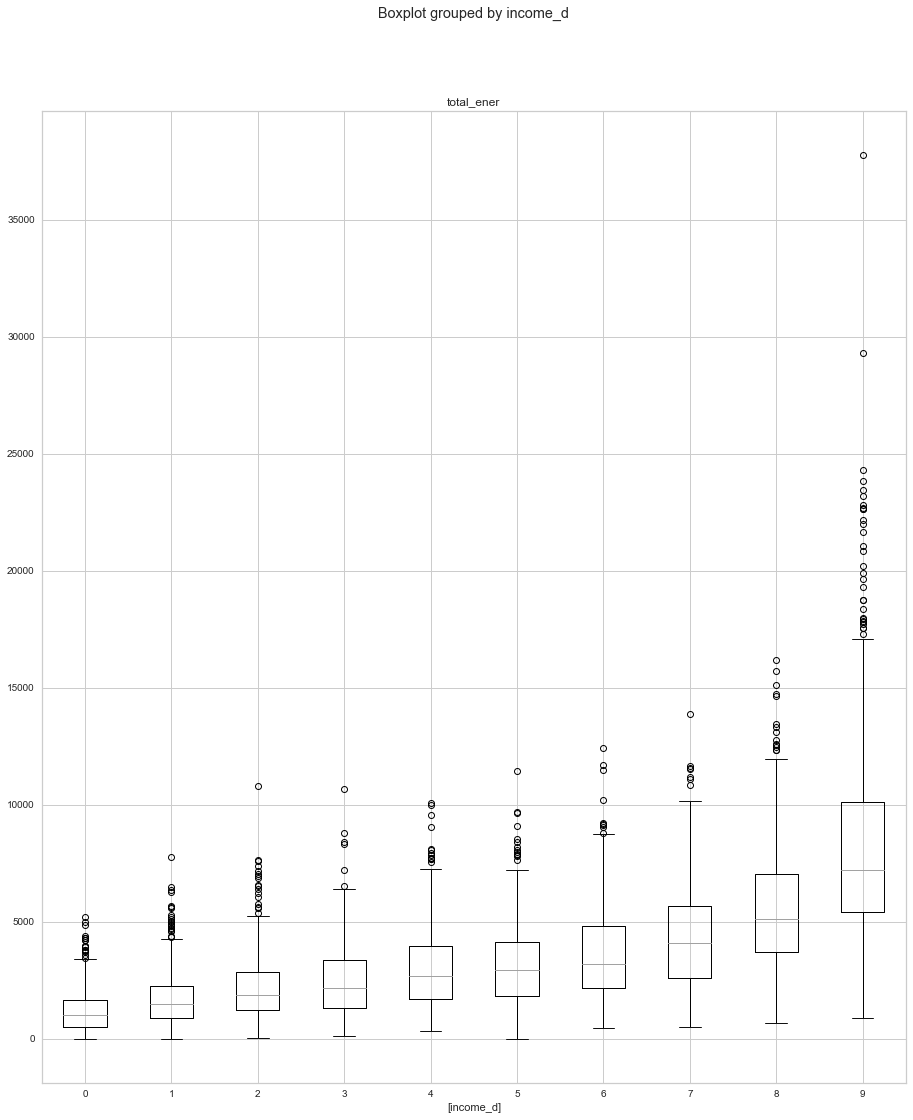

In [20]:
ener_ageb.boxplot(column=['total_ener'], by=['income_d'], figsize=(15,18))
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

### By mean

In [21]:
ener_upm_mean['income_d'] = pd.qcut(ener_upm_mean['ing_cor'], 10, labels=False)

Text(0.049826165457624, -0.06420974047744715, 'Fuel')

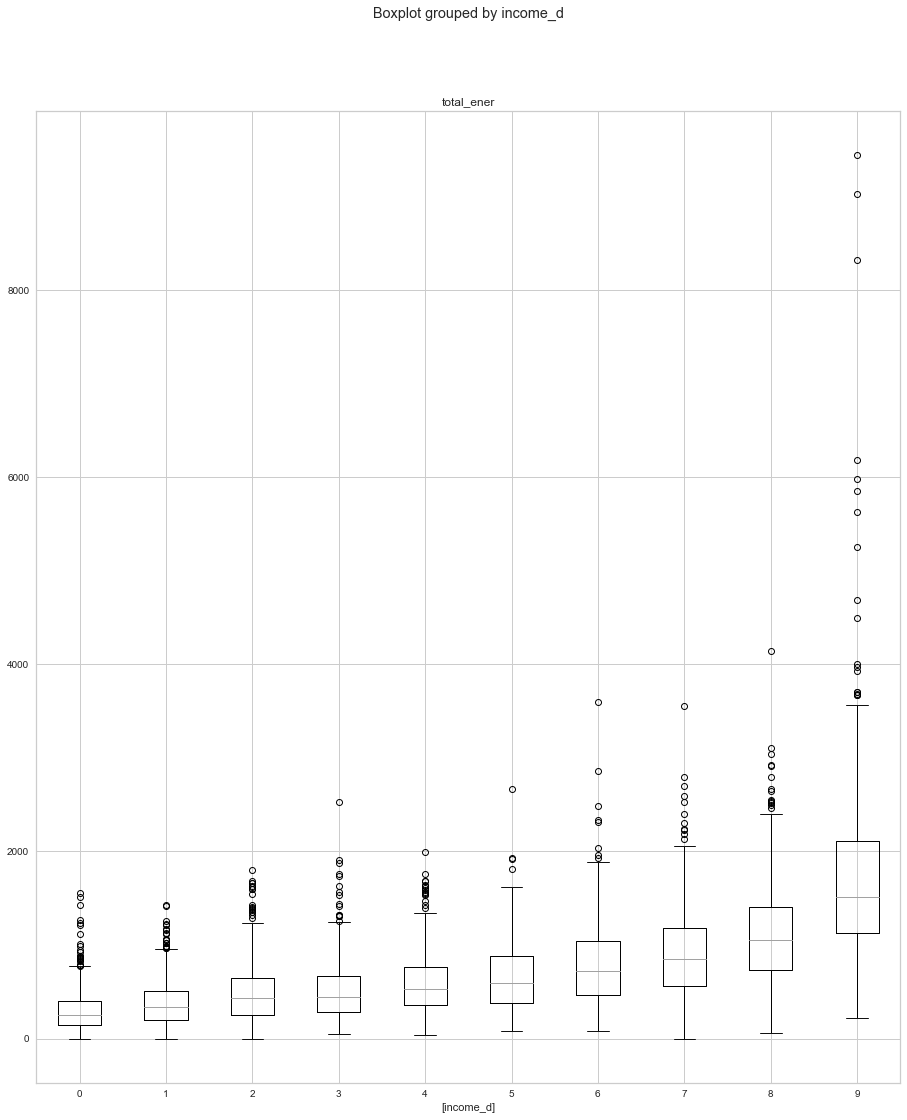

In [22]:
ener_upm_mean.boxplot(column=['total_ener'], by=['income_d'], figsize=(15,18))
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

## Clusters
### By sum

In [23]:
def silhouette_visualizer(range_n_clusters, X):
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

In [24]:
X = ener_ageb[['fuel','gas','kwh']]

In [25]:
names = ['fuel','gas','kwh']
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

In [26]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
silhouette_visualizer(range_n_clusters, X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
n = 6
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
clus_ener = ener_ageb.copy()
clus_ener['cluster'] = labels

In [ ]:
clus_ener

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

In [ ]:
n = 4
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
clus_ener = ener_ageb.copy()
clus_ener['cluster'] = labels

In [ ]:
clus_ener

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

### By mean

In [27]:
X = ener_upm_mean[['fuel','gas','kwh']]
X = X.dropna()

In [28]:
names = ['fuel','gas','kwh']
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(X)
X = pd.DataFrame(df_mm, columns=names)

For n_clusters = 2 The average silhouette_score is : 0.5115602181902669
For n_clusters = 3 The average silhouette_score is : 0.42374069061863917
For n_clusters = 4 The average silhouette_score is : 0.43124079415762817
For n_clusters = 5 The average silhouette_score is : 0.4166936024222577
For n_clusters = 6 The average silhouette_score is : 0.361835267833227
For n_clusters = 7 The average silhouette_score is : 0.3532826613676655
For n_clusters = 8 The average silhouette_score is : 0.33864502411935593


C:\Users\mrbon\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001ABCAA163C8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

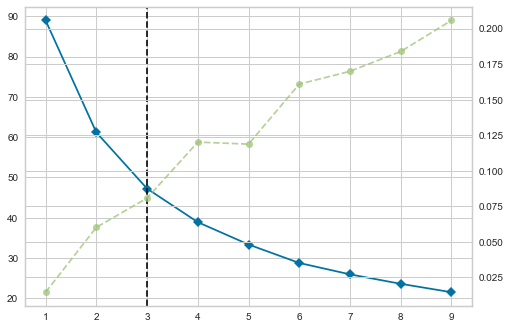

In [29]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
silhouette_visualizer(range_n_clusters, X)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer

In [30]:
n = 5
kmeans = KMeans(n_clusters=n)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [31]:
clus_ener = ener_upm_mean.dropna().copy()
clus_ener['cluster'] = labels

In [32]:
clus_ener

,CVE_ZM,upm,ing_cor,fuel,gas,kwh,total_ener,kwh_d,fuel_d,gas_d,income_d,cluster
0,1.01,1,160035.794000,859.540356,592.568676,135.033392,1178.206883,3.0,6.0,9.0,9,4
1,1.01,2,114394.640000,1488.530960,0.434214,128.887426,1245.611307,2.0,8.0,6.0,9,3
2,1.01,3,64730.850000,596.511842,520.833750,69.000445,759.551090,0.0,3.0,9.0,7,4
3,1.01,4,59461.474000,723.429653,368.274739,123.111004,1141.160448,2.0,4.0,9.0,6,4
4,1.01,5,44782.290000,602.857771,0.385614,96.508521,458.531675,0.0,3.0,5.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5892,32.01,8319,82705.530000,801.885454,0.748159,122.070761,503.291827,2.0,5.0,7.0,8,0
5893,32.01,8320,41632.293333,666.316376,0.415767,113.804384,558.084595,1.0,4.0,5.0,3,0
5894,32.01,8321,130279.955000,2376.313310,0.358023,115.175843,1699.563727,2.0,9.0,5.0,9,3
5895,32.01,8322,62875.661667,741.673939,0.302499,107.168915,849.094937,1.0,5.0,3.0,6,0


Text(0.049826165457624, -0.06420974047744715, 'Fuel')

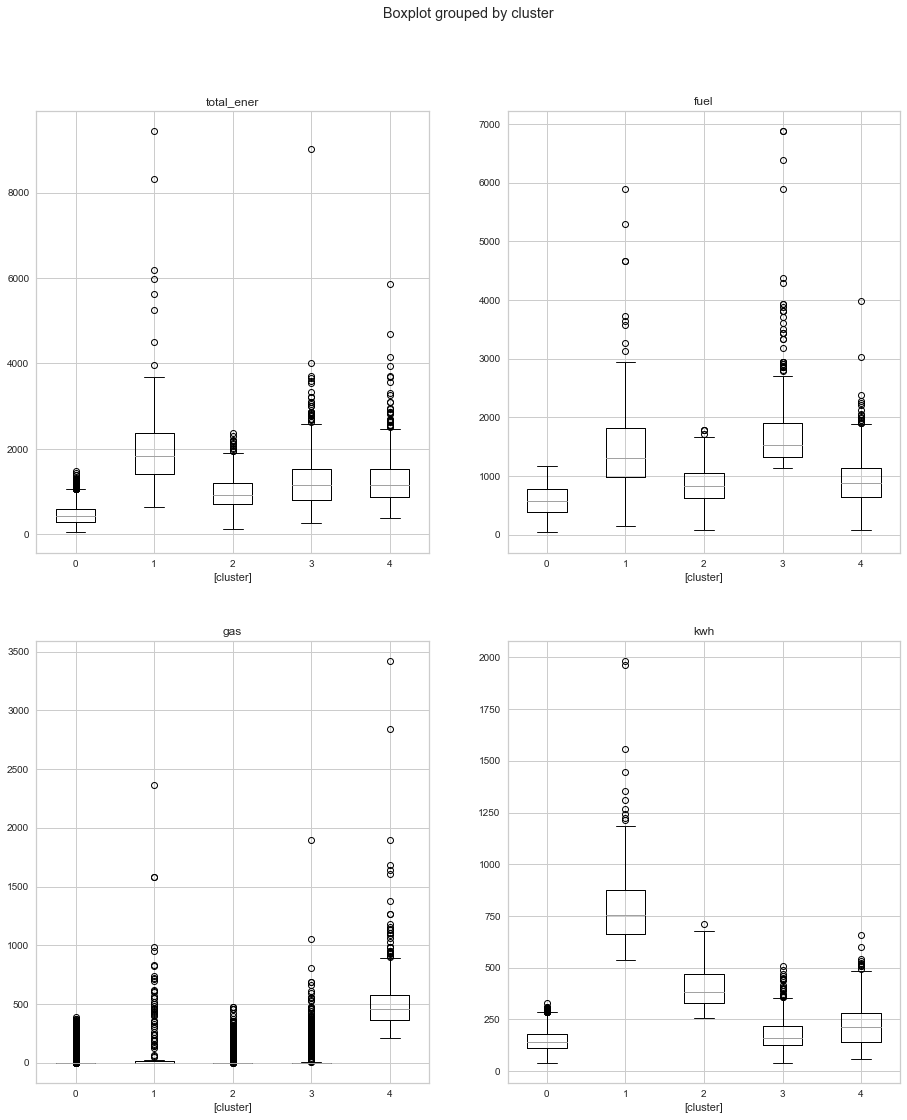

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

clus_ener.boxplot(column=['total_ener'], by=['cluster'], ax=axes[0,0]) # figsize=(15,18)
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['fuel'], by=['cluster'],  ax=axes[0,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['gas'], by=['cluster'],  ax=axes[1,0])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

clus_ener.boxplot(column=['kwh'], by=['cluster'],  ax=axes[1,1])
ax.set_xlabel('Income')
ax.set_ylabel('Fuel')

In [88]:
metropoli_clus = clus_ener.loc[clus_ener['CVE_ZM'].notnull(),['CVE_ZM','cluster','upm']].groupby(['CVE_ZM','cluster']).count()

In [89]:
metro_clus_perc = metropoli_clus.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [90]:
metro_clus_perc

upm
CVE_ZM cluster            
1.01   0         66.981132
       3         22.169811
       4         10.849057
2.01   0         64.516129
       3         29.032258
       4          6.451613
2.02   1         72.151899
       2         26.582278
       4          1.265823
2.03   0         52.702703
       2          1.351351
       3         42.567568
       4          3.378378
3.01   0         14.893617
       1          6.382979
       2         70.212766
       3          7.446809
       4          1.063830
4.01   0         59.574468
       1          1.063830
       2         28.723404
       3         10.638298
5.01   0         54.679803
       1          0.492611
       2         21.182266
       3         10.344828
       4         13.300493
5.02   0         29.032258
       1          6.451613
       2         53.225806
       3          6.451613
       4          4.838710
5.03   0         22.222222
       1         11.111111
       2         52.777778
       3          2.777778
       4         11.111111
5.04   0         46.012270
       3         14.110429
       4         39.877301
6.01   0         80.158730
       2          1.587302
       3         18.253968
6.02   0        100.000000
7.01   0         77.777778
       3         22.222222
7.02   0         78.947368
       1          2.631579
       3         15.789474
       4          2.631579
8.01   0         52.343750
       2          3.125000
       3         18.750000
       4         25.781250
8.02   0         90.909091
       2          9.090909
8.03   0         88.235294
       3         11.764706
8.04   0         47.150259
       2          9.326425
       3          4.145078
       4         39.378238
9.01   0         70.715835
       2          0.216920
       3         13.665944
       4         15.401302
10.01  0         83.333333
       3         16.666667
11.01  0         82.608696
       3          8.695652
       4          8.695652
11.02  0         57.142857
       3         42.857143
11.03  0         77.631579
       3         17.105263
       4          5.263158
11.04  0        100.000000
11.05  0        100.000000
12.01  0         91.891892
       2          2.702703
       3          5.405405
12.02  0         80.000000
       3         20.000000
13.01  0         88.888889
       3          8.888889
       4          2.222222
13.02  0        100.000000
13.03  0         94.117647
       3          5.882353
14.01  0         70.689655
       1          0.574713
       3         25.287356
       4          3.448276
14.03  0         84.210526
       3         15.789474
15.01  0        100.000000
15.02  0         64.000000
       3         24.000000
       4         12.000000
16.02  0         79.069767
       3         13.953488
       4          6.976744
16.03  0         92.307692
       3          7.692308
17.01  0        100.000000
17.02  0         80.991736
       3         14.049587
       4          4.958678
18.01  0         88.541667
       3          8.333333
       4          3.125000
19.01  0         22.039474
       1          5.921053
       2         12.171053
       3          9.539474
       4         50.328947
20.01  0         95.454545
       3          2.272727
       4          2.272727
20.02  0        100.000000
21.01  0         80.981595
       3         14.110429
       4          4.907975
21.02  0         92.857143
       3          7.142857
21.03  0        100.000000
22.01  0         46.242775
       2          0.578035
       3         23.699422
       4         29.479769
23.01  0         46.875000
       1          3.125000
       2         39.843750
       3          9.375000
       4          0.781250
23.02  0         60.606061
       2         30.303030
       3          9.090909
24.01  0        100.000000
24.02  0         70.247934
       2          0.826446
       3         15.702479
       4         13.223140
25.01  0          1.428571
       1         20.000000
       2         75.714286
       3          2.857143


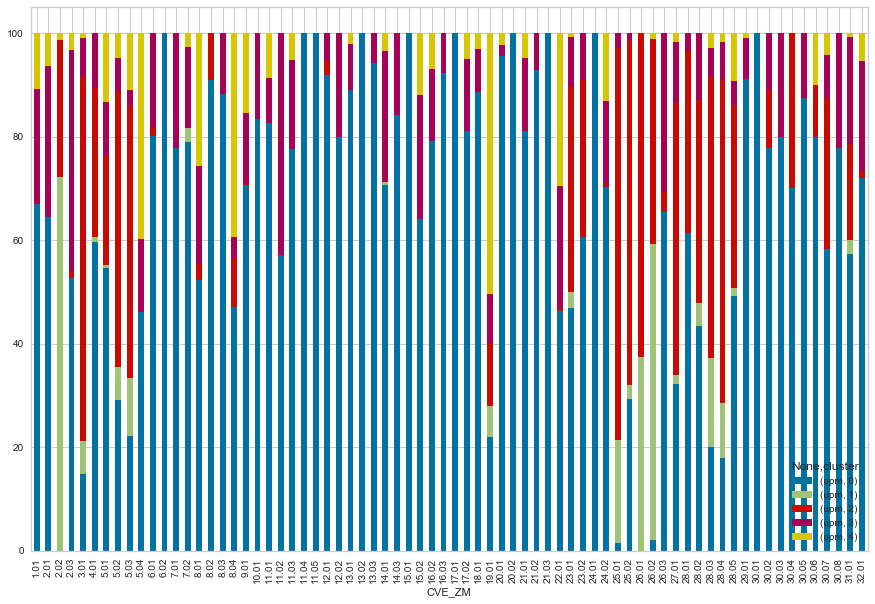

In [91]:
metro_clus_perc.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [92]:
df = metro_clus_perc.unstack()
df = df.fillna(0)

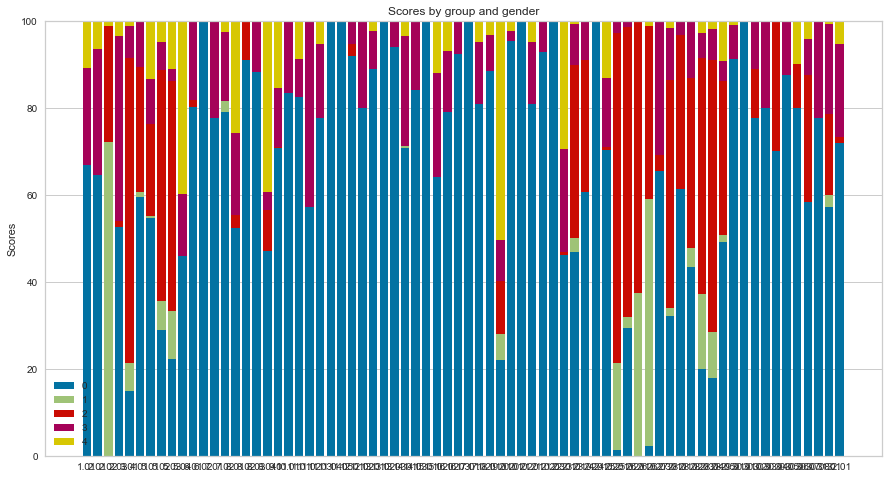

In [43]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df.index.values.astype(str), df['upm',0].values, label='0')
ax.bar(df.index.values.astype(str), df['upm',1].values, bottom=df['upm',0].values, label='1')
ax.bar(df.index.values.astype(str), df['upm',2].values, bottom=df['upm',1].values+df['upm',0], label='2')
ax.bar(df.index.values.astype(str), df['upm',3].values, bottom=df['upm',2].values+df['upm',1].values+df['upm',0], label='3')
ax.bar(df.index.values.astype(str), df['upm',4].values, bottom=df['upm',3].values+df['upm',2].values+df['upm',1].values+df['upm',0], label='4')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

## Cluster estrato

In [95]:
cluster_estrato = ener.loc[ener['CVE_ZM'].notnull(), ['upm','est_socio']].merge(clus_ener[['upm','cluster']], on='upm', how='left')
cluster_estrato = cluster_estrato[cluster_estrato['cluster'].notnull()]
cluster_estrato['cluster'] = cluster_estrato['cluster'].astype(int)

In [96]:
clus_est = cluster_estrato.groupby(['cluster','est_socio']).count()

In [97]:
clus_est_per = clus_est.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [98]:
clus_est_per

upm
cluster est_socio           
0       1           2.846255
        2          60.473979
        3          29.379540
        4           7.300226
1       1           0.519751
        2          22.765073
        3          41.683992
        4          35.031185
2       1           1.015500
        2          38.214858
        3          41.207910
        4          19.561732
3       1           0.371517
        2          32.879257
        3          38.916409
        4          27.832817
4       1           0.220103
        2          21.460015
        3          47.248716
        4          31.071167

In [99]:
df = clus_est_per.unstack()

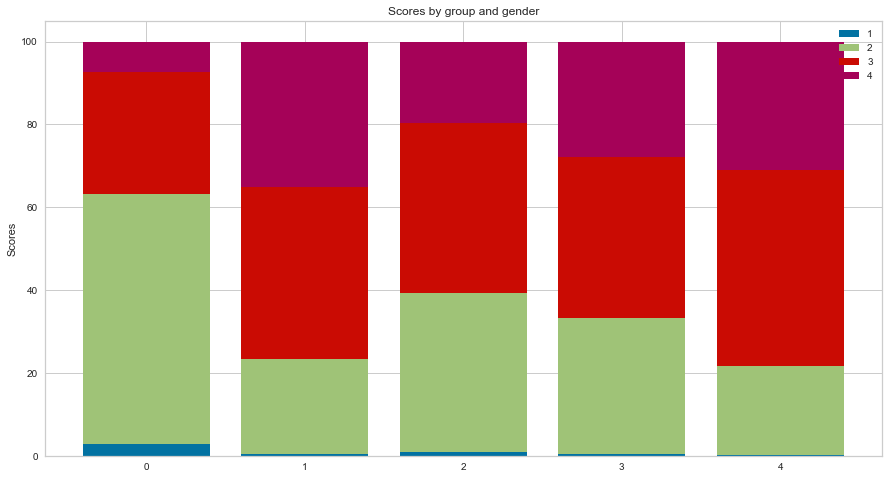

In [101]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(df.index.values.astype(str), df['upm',1].values, label='1')
ax.bar(df.index.values.astype(str), df['upm',2].values, bottom=df['upm',1].values, label='2')
ax.bar(df.index.values.astype(str), df['upm',3].values, bottom=df['upm',1].values+df['upm',2], label='3')
ax.bar(df.index.values.astype(str), df['upm',4].values, bottom=df['upm',1].values+df['upm',2].values+df['upm',3], label='4')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()